# Divorce Prediction

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Impoting dataset

In [2]:
dataset = pd.read_csv("divorce.csv")

# data set shape analysis 
dataset.shape

(361, 1)

In [3]:
# dataset visualization
dataset.head(5)

,Atr1;Atr2;Atr3;Atr4;Atr5;Atr6;Atr7;Atr8;Atr9;Atr10;Atr11;Atr12;Atr13;Atr14;Atr15;Atr16;Atr17;Atr18;Atr19;Atr20;Atr21;Atr22;Atr23;Atr24;Atr25;Atr26;Atr27;Atr28;Atr29;Atr30;Atr31;Atr32;Atr33;Atr34;Atr35;Atr36;Atr37;Atr38;Atr39;Atr40;Atr41;Atr42;Atr43;Atr44;Atr45;Atr46;Atr47;Atr48;Atr49;Atr50;Atr51;Atr52;Atr53;Atr54;Class
0,2;2;4;1;0;0;0;0;0;0;1;0;1;1;0;1;0;0;0;1;0;0;0;...
1,4;4;4;4;4;0;0;4;4;4;4;3;4;0;4;4;4;4;3;2;1;1;0;...
2,2;2;2;2;1;3;2;1;1;2;3;4;2;3;3;3;3;3;3;2;1;0;1;...
3,3;2;3;2;3;3;3;3;3;3;4;3;3;4;3;3;3;3;3;4;1;1;1;...
4,2;2;1;1;1;1;0;0;0;0;0;1;0;1;1;1;1;1;2;1;1;0;0;...


As all the entries are saperated by semicolon, So we have to use delimiter to split the data into row column

In [4]:
dataset = pd.read_csv('divorce.csv',delimiter=";",encoding = "ISO-8859-1")

# datset look
dataset.head(5)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


## Analysing and Visualizing dataset

In [5]:
dataset.shape

(361, 55)

Dataset contain 170 rows denoting the response of 170 people on 54 different questions represented by 54 different columns.

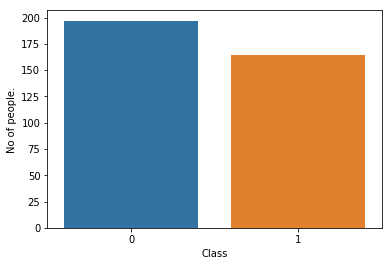

In [6]:
sns.countplot('Class',data = dataset)
plt.ylabel('No of people.')
plt.show()

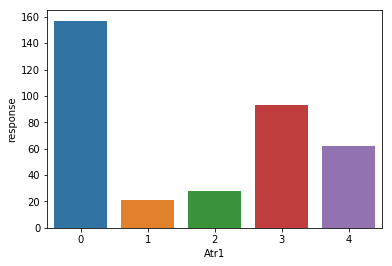

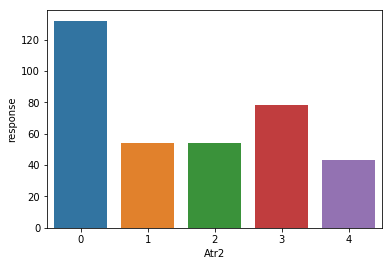

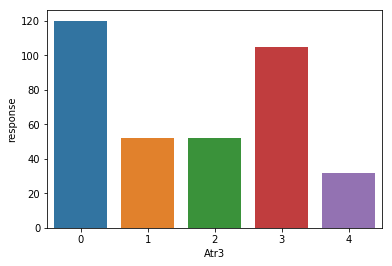

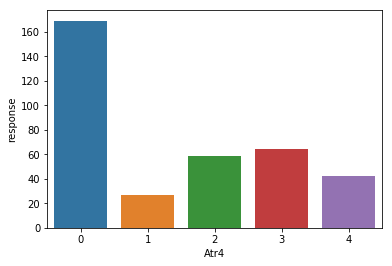

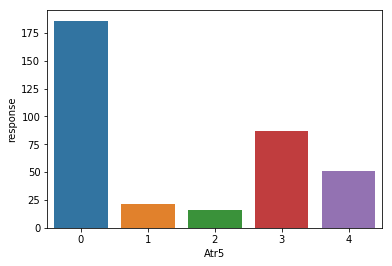

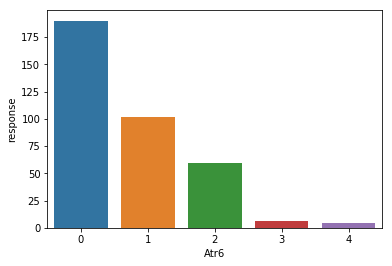

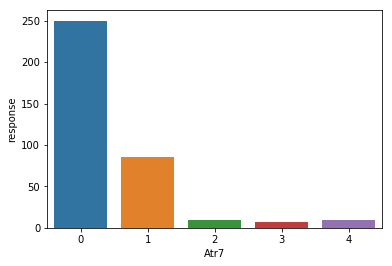

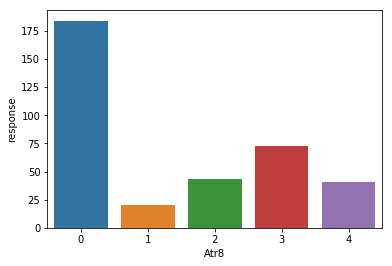

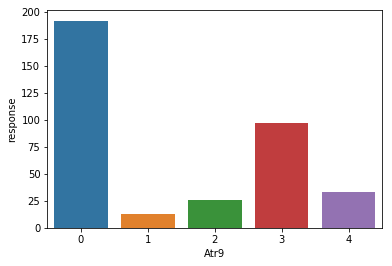

In [7]:
for i in range(1,10):
    sns.countplot('Atr'+str(i),data = dataset)
    plt.ylabel('response')
    plt.show()

## Data Cleaning - Using Correlation matrix 

Eliminating column that does not affect the result.

In [8]:
# Correlation matrix
corr_mt = dataset.corr().abs()

corr_mt.head(5)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
Atr1,1.000000,0.804181,0.836462,0.828728,0.876603,0.307662,0.439616,0.798373,0.843789,0.787189,...,0.396397,0.577391,0.623865,0.668057,0.719335,0.678983,0.574325,0.610404,0.767900,0.858821
Atr2,0.804181,1.000000,0.802716,0.774873,0.815003,0.124424,0.431214,0.858192,0.823884,0.773634,...,0.403370,0.627722,0.636995,0.652254,0.671069,0.635567,0.533148,0.599856,0.726594,0.817020
Atr3,0.836462,0.802716,1.000000,0.807700,0.806894,0.289304,0.477704,0.760487,0.821608,0.755493,...,0.321331,0.559145,0.634675,0.640785,0.661194,0.606409,0.494304,0.595663,0.683845,0.805374
Atr4,0.828728,0.774873,0.807700,1.000000,0.814242,0.200458,0.486597,0.791799,0.824712,0.863731,...,0.338253,0.547497,0.628855,0.690191,0.681343,0.621158,0.528094,0.581909,0.694539,0.818306
Atr5,0.876603,0.815003,0.806894,0.814242,1.000000,0.322154,0.400542,0.878712,0.918972,0.824006,...,0.475513,0.721045,0.651761,0.762686,0.799732,0.747047,0.670189,0.723128,0.843541,0.905292


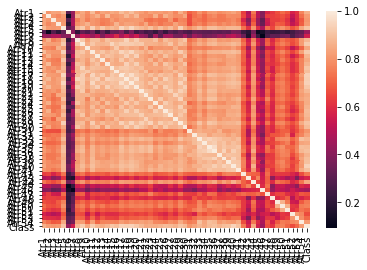

In [9]:
sns.heatmap(corr_mt, 
        xticklabels=corr_mt.columns,
        yticklabels=corr_mt.columns)

In [10]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corr_mt.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [11]:
# using upper triangle to eleminating

upper_mat = corr_mt.where(np.triu(np.ones(corr_mt.shape),k = 1).astype(np.bool))

upper_mat.head(10)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
Atr1,NaN,0.804181,0.836462,0.828728,0.876603,0.307662,0.439616,0.798373,0.843789,0.787189,...,0.396397,0.577391,0.623865,0.668057,0.719335,0.678983,0.574325,0.610404,0.767900,0.858821
Atr2,NaN,NaN,0.802716,0.774873,0.815003,0.124424,0.431214,0.858192,0.823884,0.773634,...,0.403370,0.627722,0.636995,0.652254,0.671069,0.635567,0.533148,0.599856,0.726594,0.817020
Atr3,NaN,NaN,NaN,0.807700,0.806894,0.289304,0.477704,0.760487,0.821608,0.755493,...,0.321331,0.559145,0.634675,0.640785,0.661194,0.606409,0.494304,0.595663,0.683845,0.805374
Atr4,NaN,NaN,NaN,NaN,0.814242,0.200458,0.486597,0.791799,0.824712,0.863731,...,0.338253,0.547497,0.628855,0.690191,0.681343,0.621158,0.528094,0.581909,0.694539,0.818306
Atr5,NaN,NaN,NaN,NaN,NaN,0.322154,0.400542,0.878712,0.918972,0.824006,...,0.475513,0.721045,0.651761,0.762686,0.799732,0.747047,0.670189,0.723128,0.843541,0.905292
Atr6,NaN,NaN,NaN,NaN,NaN,NaN,0.415599,0.210893,0.325186,0.281527,...,0.151903,0.238766,0.213875,0.225466,0.250281,0.208238,0.249453,0.299719,0.320021,0.435531
Atr7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.429879,0.534991,0.508457,...,0.091950,0.274770,0.320330,0.312315,0.354106,0.370423,0.270066,0.336616,0.366577,0.556952
Atr8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.915969,0.824441,...,0.445611,0.682884,0.583009,0.675098,0.729135,0.688586,0.669720,0.712386,0.814628,0.880706
Atr9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.852125,...,0.443460,0.699356,0.608414,0.716462,0.761009,0.719534,0.659249,0.703665,0.817854,0.924762
Atr10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.344768,0.561839,0.543918,0.668425,0.687848,0.633629,0.524663,0.596208,0.705464,0.842606


As lower matrix data is set to NaN, now we can check upper matrix the eliminate column whose correlation is high.

Finding the columns to drop.

In [12]:
column_to_drop = [col for col in upper_mat.columns if any(upper_mat[col] > 0.94)]

column_to_drop

['Atr15',
 'Atr17',
 'Atr19',
 'Atr20',
 'Atr28',
 'Atr29',
 'Atr36',
 'Atr38',
 'Class']

Now, we got the column name of all dataset whose correlation is less than 0.94.

In [13]:
cleaned_dataset = dataset.drop(['Atr15','Atr17','Atr19','Atr20','Atr28','Atr29','Atr36','Atr38'],axis = 1)

cleaned_dataset.head(5)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [14]:
cleaned_dataset.shape

(361, 47)

In [15]:
cleaned_dataset.head(5)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


## Model creation - Data Splitting into Train and test sets

In [17]:
# Independent variable set
X = cleaned_dataset.iloc[:,:-1]

# dependent variable set
y = cleaned_dataset.Class

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 100)

## Applying Algorithms

### Logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\dell\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
log_y_pred = log_reg.predict(X_test)

In [22]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, log_y_pred)
cnf_matrix

array([[75,  0],
       [ 2, 68]], dtype=int64)

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, log_y_pred))
print("Precision:",metrics.precision_score(y_test, log_y_pred))
print("Recall:",metrics.recall_score(y_test, log_y_pred))

Accuracy: 0.9862068965517241
Precision: 1.0
Recall: 0.9714285714285714


### K-Nearest Neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
knn_y_pred = classifier.predict(X_test)

In [26]:
cnf_matrix = metrics.confusion_matrix(y_test, knn_y_pred)
cnf_matrix

array([[75,  0],
       [ 3, 67]], dtype=int64)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, log_y_pred))
print("Precision:",metrics.precision_score(y_test, log_y_pred))
print("Recall:",metrics.recall_score(y_test, log_y_pred))

Accuracy: 0.9862068965517241
Precision: 1.0
Recall: 0.9714285714285714


### Support vector Machine(SVM)

In [28]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 50,degree=6)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=6, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=50,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
svm_y_pred = classifier.predict(X_test)

In [30]:
cnf_matrix = metrics.confusion_matrix(y_test, svm_y_pred)
cnf_matrix

array([[75,  0],
       [ 2, 68]], dtype=int64)

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, svm_y_pred))
print("Precision:",metrics.precision_score(y_test, svm_y_pred))
print("Recall:",metrics.recall_score(y_test, svm_y_pred))

Accuracy: 0.9862068965517241
Precision: 1.0
Recall: 0.9714285714285714


### Kernel SVM

In [32]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\dell\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
# Predicting the Test set results
ksvm_y_pred = classifier.predict(X_test)

In [34]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ksvm_y_pred)
cm

array([[75,  0],
       [ 3, 67]], dtype=int64)

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, ksvm_y_pred))
print("Precision:",metrics.precision_score(y_test, ksvm_y_pred))
print("Recall:",metrics.recall_score(y_test, ksvm_y_pred))

Accuracy: 0.9793103448275862
Precision: 1.0
Recall: 0.9571428571428572


### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [37]:
# Predicting the Test set results
dt_y_pred = classifier.predict(X_test)

In [38]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, dt_y_pred)
cm

array([[75,  0],
       [ 2, 68]], dtype=int64)

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, dt_y_pred))
print("Precision:",metrics.precision_score(y_test, dt_y_pred))
print("Recall:",metrics.recall_score(y_test, dt_y_pred))

Accuracy: 0.9862068965517241
Precision: 1.0
Recall: 0.9714285714285714


### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [41]:
# Predicting the Test set results
rdt_y_pred = classifier.predict(X_test)

In [42]:
cm = confusion_matrix(y_test, rdt_y_pred)
cm

array([[75,  0],
       [ 2, 68]], dtype=int64)

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, rdt_y_pred))
print("Precision:",metrics.precision_score(y_test, rdt_y_pred))
print("Recall:",metrics.recall_score(y_test, rdt_y_pred))

Accuracy: 0.9862068965517241
Precision: 1.0
Recall: 0.9714285714285714


## Result analysis of various algorithms

In [44]:
print("Accuracy of Logistic regression",metrics.accuracy_score(y_test,log_y_pred))
print("Accuracy of K-Nearest Neighbors",metrics.accuracy_score(y_test,knn_y_pred))
print("Accuracy of Support vector machine",metrics.accuracy_score(y_test,svm_y_pred))
print("Accuracy of Kernel Support Vector Machine",metrics.accuracy_score(y_test,ksvm_y_pred))
print("Accuracy of Decision Tree",metrics.accuracy_score(y_test,dt_y_pred))
print("Accuracy of Random Forest",metrics.accuracy_score(y_test,rdt_y_pred))

Accuracy of Logistic regression 0.9862068965517241
Accuracy of K-Nearest Neighbors 0.9793103448275862
Accuracy of Support vector machine 0.9862068965517241
Accuracy of Kernel Support Vector Machine 0.9793103448275862
Accuracy of Decision Tree 0.9862068965517241
Accuracy of Random Forest 0.9862068965517241
